# 手写数字识别

和求解机器学习问题的步骤（分成学习和推理两个阶段进行）一样，使用神经网络解决问题时，也需要首先使用训练数据（学习数据）进行权重参数的学习；进行推理时，使用刚才学习到的参数，对输入数据进行分类。

MNIST 数据集

* MNIST是机器学习领域最有名的数据集之一，被应用于从简单的实验到发表的论文研究等各种场合。MNIST数据集是由0 到9 的数字图像构成的（图3-24）。训练图像有6 万张，测试图像有1 万张，这些图像可以用于学习和推理。
* MNIST数据集的一般使用方法是，先用训练图像进行学习，再用学习到的模型度量能在多大程度上对测试图像进行正确的分类。
* MNIST的图像数据是28 像素× 28 像素的灰度图像（1 通道），各个像素的取值在0 到255 之间。每个图像数据都相应地标有“7”“2”“1”等标签。

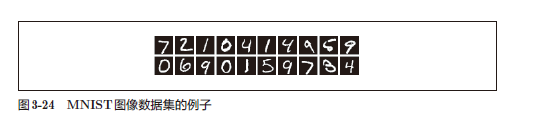


MNIST 数据集 [下载地址](http://yann.lecun.com/exdb/mnist/ "MNIST数据集")

4个压缩包
* train-images-idx3-ubyte.gz:  training set images
* train-labels-idx1-ubyte.gz:  training set labels 
* t10k-images-idx3-ubyte.gz:   test set images
* t10k-labels-idx1-ubyte.gz:   test set labels

数据格式  
TRAINING SET LABEL FILE (train-labels-idx1-ubyte):  
[offset] [type]          [value]          [description]   
0000     32 bit integer  0x00000801(2049) magic number (MSB first)   
0004     32 bit integer  60000            number of items   
0008     unsigned byte   ??               label   
0009     unsigned byte   ??               label   
........   
xxxx     unsigned byte   ??               label  
The labels values are 0 to 9.  
  
TRAINING SET IMAGE FILE (train-images-idx3-ubyte):  
[offset] [type]          [value]          [description]   
0000     32 bit integer  0x00000803(2051) magic number   
0004     32 bit integer  60000            number of images   
0008     32 bit integer  28               number of rows   
0012     32 bit integer  28               number of columns   
0016     unsigned byte   ??               pixel   
0017     unsigned byte   ??               pixel   
........   
xxxx     unsigned byte   ??               pixel  
Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).  
  
TEST SET LABEL FILE (t10k-labels-idx1-ubyte):  
[offset] [type]          [value]          [description]   
0000     32 bit integer  0x00000801(2049) magic number (MSB first)   
0004     32 bit integer  10000            number of items   
0008     unsigned byte   ??               label   
0009     unsigned byte   ??               label   
........   
xxxx     unsigned byte   ??               label  
The labels values are 0 to 9.  

TEST SET IMAGE FILE (t10k-images-idx3-ubyte):  
[offset] [type]          [value]          [description]   
0000     32 bit integer  0x00000803(2051) magic number   
0004     32 bit integer  10000            number of images   
0008     32 bit integer  28               number of rows   
0012     32 bit integer  28               number of columns   
0016     unsigned byte   ??               pixel   
0017     unsigned byte   ??               pixel   
........   
xxxx     unsigned byte   ??               pixel  
Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).  

 

神经网络的框架定义：

* 输入层有784 个神经元。输入层的784 这个数字来源于图像大小的28 × 28 = 784。
* 输出层有10 个神经元。输出层的10 这个数字来源于10 类别分类（数字0 到9，共10 类别）。
* 2个隐藏层。第1个隐藏层有50个神经元，第2个隐藏层有100个神经元。这个50 和100 可以设置为任何值。

省略了下载相关的代码处理, 压缩包和代码在同一目录下。

读取zip包数据接口 data.py

In [2]:
# coding: utf-8
import os.path
import gzip
import pickle
import os
import numpy as np

key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath(__file__))
save_file = dataset_dir + "/mnist.pkl"
print("save file: ", save_file)

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    return dataset

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])

def get_test_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    print("init_network Done!")
    return network

def init_data():
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("init_data Done!")

NameError: name '__file__' is not defined

softmax.py


In [3]:
# coding: utf-8
import numpy as np

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

sigmoid.py

In [4]:
# coding: utf-8
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

mnist.py


In [5]:
# coding: utf-8
import os.path
import gzip
import pickle
import os
import numpy as np
from sigmoid import *
from softmax import *
from data import *

def init():
    init_data()
    print("init_mnist Done!")

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

def processData():
    x, t = get_test_data()
    print(x.shape) # (10000, 784)
    print(t.shape) # (10000,)
    network = init_network() #sample_weight.pkl
    accuracy_cnt = 0

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    print("shape W1~W3: ", W1.shape,W2.shape,W3.shape)
    print("shape b1~b3: ", b1.shape,b2.shape,b3.shape)

    for i in range(len(x)):
        y = predict(network, x[i])
        p= np.argmax(y) # 获取概率最高的元素的索引
        if p == t[i]:
            accuracy_cnt += 1
    print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

if __name__ == '__main__':
    init()
    processData()

ImportError: No module named sigmoid

sample_weight.pkl 是已有文件，保存的W1，W2，W3和b1, b2, b3

运行结果：Accuracy:0.9352

批处理优化
修改mnist.py中的processData(), 对循环每100个执行一次predict()


In [6]:
# coding: utf-8
import os.path
import gzip
import pickle
import os
import numpy as np
from sigmoid import *
from softmax import *
from data import *

def init():
    init_data()
    print("init_mnist Done!")

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

def processData():
    x, t = get_test_data()
    print(x.shape) # (10000, 784)
    print(t.shape) # (10000,)
    network = init_network() #sample_weight.pkl
    accuracy_cnt = 0

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    print("shape W1~W3: ", W1.shape,W2.shape,W3.shape)
    print("shape b1~b3: ", b1.shape,b2.shape,b3.shape)

    #批处理
    batch_size = 100 # 批数量
    for i in range(0, len(x), batch_size):
        x_batch = x[i:i+batch_size]
        y_batch = predict(network, x_batch)
        p = np.argmax(y_batch, axis=1)
        accuracy_cnt += np.sum(p == t[i:i+batch_size])

    print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

if __name__ == '__main__':
    init()
    processData()

ImportError: No module named sigmoid